# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 5


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3 

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_url_response = requests.get(btc_url).json()
btc_url_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18592012,
   'total_supply': 18592012,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 34221.0,
     'volume_24h': 66250132006,
     'market_cap': 635492394354,
     'percentage_change_1h': 1.24081486934755,
     'percentage_change_24h': 5.10672573209751,
     'percentage_change_7d': 24.7809720216124,
     'percent_change_1h': 1.24081486934755,
     'percent_change_24h': 5.10672573209751,
     'percent_change_7d': 24.7809720216124},
    'CAD': {'price': 43405.9164,
     'volume_24h': 84031667436.4104,
     'market_cap': 806058552998.614,
     'percent_change_1h': 1.24081486934755,
     'percent_change_24h': 5.10672573209751,
     'percent_change_7d': 24.7809720216124}},
   'last_updated': 1609901017}},
 'metadata': {'timestamp': 1609901017,
  'num_cryptocurrencies': 1389,
  'error': None}}

In [5]:
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_url_response = requests.get(eth_url).json()
eth_url_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 114134184,
   'total_supply': 114134184,
   'max_supply': 0,
   'quotes': {'USD': {'price': 1089.14,
     'volume_24h': 42440131315,
     'market_cap': 124215393854,
     'percentage_change_1h': 1.65981203981322,
     'percentage_change_24h': 0.0612204037344328,
     'percentage_change_7d': 48.0636068357536,
     'percent_change_1h': 1.65981203981322,
     'percent_change_24h': 0.0612204037344328,
     'percent_change_7d': 48.0636068357536},
    'CAD': {'price': 1381.465176,
     'volume_24h': 53831062559.946,
     'market_cap': 157554805564.414,
     'percent_change_1h': 1.65981203981322,
     'percent_change_24h': 0.0612204037344328,
     'percent_change_7d': 48.0636068357536}},
   'last_updated': 1609901038}},
 'metadata': {'timestamp': 1609901038,
  'num_cryptocurrencies': 1389,
  'error': None}}

In [6]:
# Fetch current BTC price
current_btc_price = btc_url_response['data']['1']['quotes']['USD']['price']
print(current_btc_price)

34221.0


In [7]:
# Fetch current ETH price
current_eth_price = eth_url_response['data']['1027']['quotes']['USD']['price']
print(current_eth_price)

1089.14


In [8]:
# Compute current value of my crpto
my_btc_value = (my_btc * current_btc_price)
my_eth_value = (my_eth * current_eth_price)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41065.20
The current value of your 5.3 ETH is $5772.44


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
shares_data = {
    "shares": [200, 50]
}

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-29", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset( 
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2020-12-29 00:00:00-05:00  118.06  118.06  117.92  118.05  3255442  373.81   

                                                          
                          high     low   close    volume  
time                                                      
2020-12-29 00:00:00-05:00  374  370.83  371.48  45214280

In [12]:
df_portfolio.index = df_portfolio.index.date # dropping time from the index. only want date
df_portfolio.head()

AGG                                      SPY               \
              open    high     low   close   volume    open high     low   
2020-12-29  118.06  118.06  117.92  118.05  3255442  373.81  374  370.83   

                              
             close    volume  
2020-12-29  371.48  45214280

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.05
Current SPY closing price: $371.48


In [16]:
# Compute the current value of shares
my_agg = 200
my_spy = 50

df_shares = pd.DataFrame(shares_data, index=tickers)
df_shares

my_spy_value = agg_close_price * df_shares.loc["AGG"]["shares"]
my_agg_value = spy_close_price * df_shares.loc["SPY"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23610.00
The current value of your 200 AGG shares is $18574.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

crypto_value = (my_btc_value + my_eth_value)
stocks_value = (my_spy_value + my_agg_value)
total_value = {
    "crypto": [crypto_value],
    "stocks": [stocks_value],
}


# # Create savings DataFrame
df_savings = pd.DataFrame(total_value)

# # Display savings DataFrame
display(df_savings)

,crypto,stocks
0,46837.642,42184.0


In [ ]:
# Plot savings pie chart
df_savings.plot.pie(y="df_savings", title="Crypto-Stocks Portfolio Composition") #need fix y-axis. erroring 

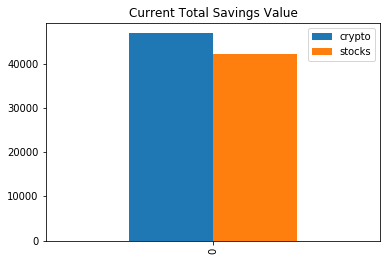

In [61]:
df_savings.plot.bar(title="Current Total Savings Value") #creating barplot instead since pie chart did not work

In [48]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amt_savings = my_spy_value + my_agg_value + emergency_fund
print(f"My current total amount of savings is ${total_amt_savings}.")


My current total amount of savings is $78184.0.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
df_spy_agg = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_spy_agg.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [21]:
df_spy_agg.index = df_spy_agg.index.date # dropping time
df_spy_agg.head()

AGG                                           SPY          \
              open      high      low   close     volume    open    high   
2015-08-07  109.14  109.2750  109.035  109.21  2041167.0  208.16  208.34   
2015-08-10  109.15  109.1700  108.920  109.06  1149778.0  209.28  210.67   
2015-08-11  109.42  109.5765  109.284  109.42  1420907.0  208.98  209.47   
2015-08-12  109.55  109.7100  109.350  109.36  1468979.0  207.11  209.14   
2015-08-13  109.36  109.3651  109.110  109.15  1465173.0  208.73  209.55   

                                       
               low   close     volume  
2015-08-07  206.87  207.93   87669782  
2015-08-10  209.28  210.58   66755890  
2015-08-11  207.76  208.63   88424557  
2015-08-12  205.36  208.89  136171450  
2015-08-13  208.01  208.63   77197796

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

In [23]:
# Printing the simulation input data
MC_spy_agg = MCSimulation(
    portfolio_data = df_spy_agg,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

MC_spy_agg.portfolio_data.head()

AGG                                                        SPY  \
              open      high      low   close     volume daily_return    open   
2015-08-07  109.14  109.2750  109.035  109.21  2041167.0          NaN  208.16   
2015-08-10  109.15  109.1700  108.920  109.06  1149778.0    -0.001374  209.28   
2015-08-11  109.42  109.5765  109.284  109.42  1420907.0     0.003301  208.98   
2015-08-12  109.55  109.7100  109.350  109.36  1468979.0    -0.000548  207.11   
2015-08-13  109.36  109.3651  109.110  109.15  1465173.0    -0.001920  208.73   

                                                            
              high     low   close     volume daily_return  
2015-08-07  208.34  206.87  207.93   87669782          NaN  
2015-08-10  210.67  209.28  210.58   66755890     0.012745  
2015-08-11  209.47  207.76  208.63   88424557    -0.009260  
2015-08-12  209.14  205.36  208.89  136171450     0.001246  
2015-08-13  209.55  208.01  208.63   77197796    -0.001245

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_spy_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996121,1.009245,0.999970,1.000393,0.997302,0.987574,0.994167,1.015414,1.009777,0.997735,...,0.996998,1.004821,0.997072,0.997639,1.000693,0.984544,1.000683,0.997485,1.003011,1.000563
2,0.994919,1.012250,0.992527,1.006854,0.988775,0.991371,0.996504,1.015089,1.011938,0.999602,...,1.004032,1.006513,0.995182,1.000015,1.012282,0.992109,1.002419,1.007927,1.003056,0.999273
3,0.999887,1.012707,0.981107,1.006853,0.988855,0.995163,0.993775,1.020496,1.006047,0.990979,...,1.006430,1.002788,0.986472,0.990200,1.031483,0.981904,0.984474,1.013476,0.990226,1.006914
4,1.000960,1.016614,0.977445,1.011745,0.987945,1.006662,0.994571,1.013539,1.005923,0.996952,...,1.014346,0.994349,0.982698,0.985375,1.037879,0.978677,0.974142,1.023242,0.986729,1.002192
5,1.009317,1.012456,0.974303,1.018088,0.989287,1.004438,1.001413,1.016306,1.005001,0.998506,...,1.014756,0.989547,0.985274,0.991731,1.033903,0.972377,0.971697,1.027590,0.992829,1.007640
6,1.014975,1.005968,0.966124,1.011980,0.981651,1.014293,1.006728,1.009815,1.006025,1.010247,...,1.003589,0.986028,0.986840,0.978216,1.034411,0.971423,0.971731,1.036952,0.992664,1.002784
7,1.019586,1.010699,0.964719,1.017546,0.978564,1.004362,1.012326,0.999323,1.011882,1.008770,...,1.000635,0.990786,0.992368,0.971831,1.031944,0.970164,0.961742,1.048969,0.999845,1.003723
8,1.017308,1.007880,0.962254,1.016753,0.971223,1.000131,1.005875,0.982220,1.013065,1.010767,...,0.994404,0.984401,0.990881,0.979421,1.045630,0.978350,0.962652,1.056874,1.002143,1.015626
9,1.018988,1.002410,0.962152,1.013765,0.981145,0.996705,1.014694,0.987312,1.006600,1.016851,...,0.982176,0.985790,0.998833,0.983343,1.043290,0.986876,0.954146,1.063356,1.007375,1.004026


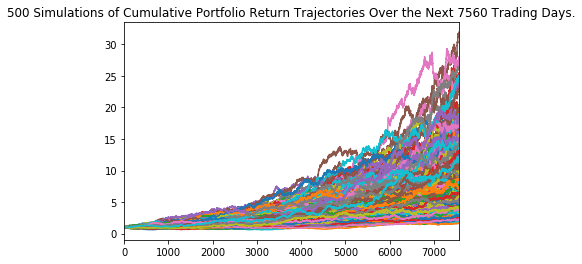

In [25]:
# Plot simulation outcomes
MC_spy_agg_simulation = MC_spy_agg.plot_simulation()

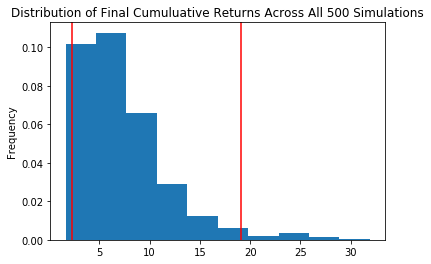

In [35]:
# Plot probability distribution and confidence intervals
MC_spy_agg_distribution = MC_spy_agg.plot_distribution() 

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_spy_agg_stats = MC_spy_agg.summarize_cumulative_return()

MC_spy_agg_stats.head()

count    500.000000
mean       7.359524
std        4.416098
min        1.637958
25%        4.305027
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_1 = round(MC_spy_agg_stats[4]*20000,2)


# Print results
print(f"There is a 25% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within"
      f" ${ci}")

There is a 25% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within $86100.53


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_2 = round(MC_spy_agg_stats[4]*(20000 * 1.5),2)


# Print results
print(f"There is a 25% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within"
      f" ${ci_2}.")

There is a 25% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within $129150.8.
